In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (16, 6)})

**IMPORT DATA FROM CLEAN CSV**

In [2]:
pd.set_option('display.max_columns', None)
shark_attacks = pd.read_csv("../data/clean_attacks.csv", encoding="latin1")
shark_attacks = pd.DataFrame(shark_attacks)
shark_attacks.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,clean_time,clean_age,clean_year,clean_sex,clean_activity
1261,2008.05.07.a,07-May-2008,2008.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Zane Atcha,M,6,2 inch laceration to left lower calf.,N,Just before noon,NaN,"M. Johnson, Daytona News-Journal, 5/8/2008; S....",Afternoon,6,2008,M,Unknown
3196,1976.01.02,02-Jan-1976,1976.0,Unprovoked,NEW ZEALAND,North Island,"Te Kaha, East coast",Spearfishing,John Grainger Leith,M,NaN,FATAL,Y,13h00,Bronze whaler shark,"R.D. Weeks, GSAF; New Zealand Herald, 3/3/2001",Afternoon,Unknown,1976,M,Fishing
1062,2009.12.20.a,20-Dec-2009,2009.0,Unprovoked,AUSTRALIA,Queensland,Lamont Reef,Spearfishing,John Pengelly,M,18,Lacerations to hand & forearm,N,07h30,"Bull shark, 3m","Brisbane Times, 12/20/2009",Morning,18,2009,M,Fishing


**VISUALIZATION**

    A Century of Shark Attacks: Tracing the Evolution

C:\Users\noemi\AppData\Local\Temp\ipykernel_31884\1337487043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks_1['clean_year'] = shark_attacks_1['clean_year'].astype(int)


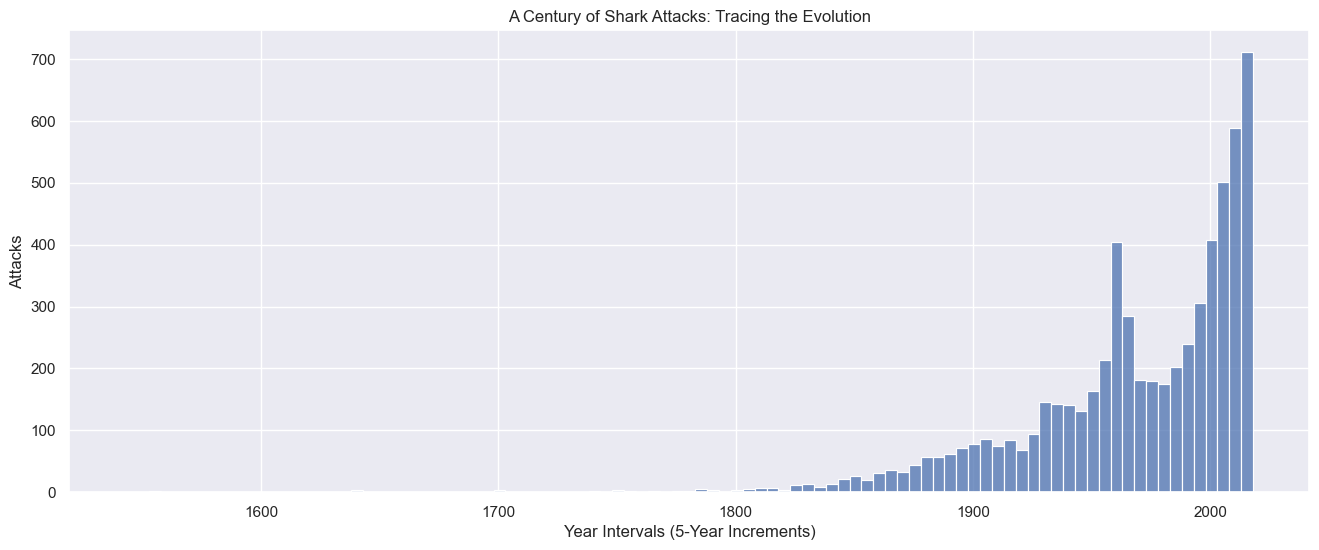

In [3]:
shark_attacks_1 = shark_attacks[shark_attacks['clean_year'] != 'Unknown']
shark_attacks_1['clean_year'] = shark_attacks_1['clean_year'].astype(int)
bins = range(int(shark_attacks_1['clean_year'].min()), int(shark_attacks_1['clean_year'].max()) + 5, 5)
sns.histplot(data=shark_attacks_1, x='clean_year', bins=bins)
plt.title('A Century of Shark Attacks: Tracing the Evolution')
plt.xlabel('Year Intervals (5-Year Increments)')
plt.ylabel('Attacks')
plt.show()

In [4]:
print("Max is: ", max(shark_attacks_1['clean_year']))
print("Min is: ", min(shark_attacks_1['clean_year']))

Max is:  2018
Min is:  1543


What I wanted to see in the graph above is the evolution of shark attacks over the years, if they were more active in the last centuries or if their activity has increased in the last 20 years. As there were almost no attacks between 1543 and 1800, I have made another graph of the evolution since they started to be visible in the graph above, which is around 1800 so that we see the evolution more distributed on the x-axis.

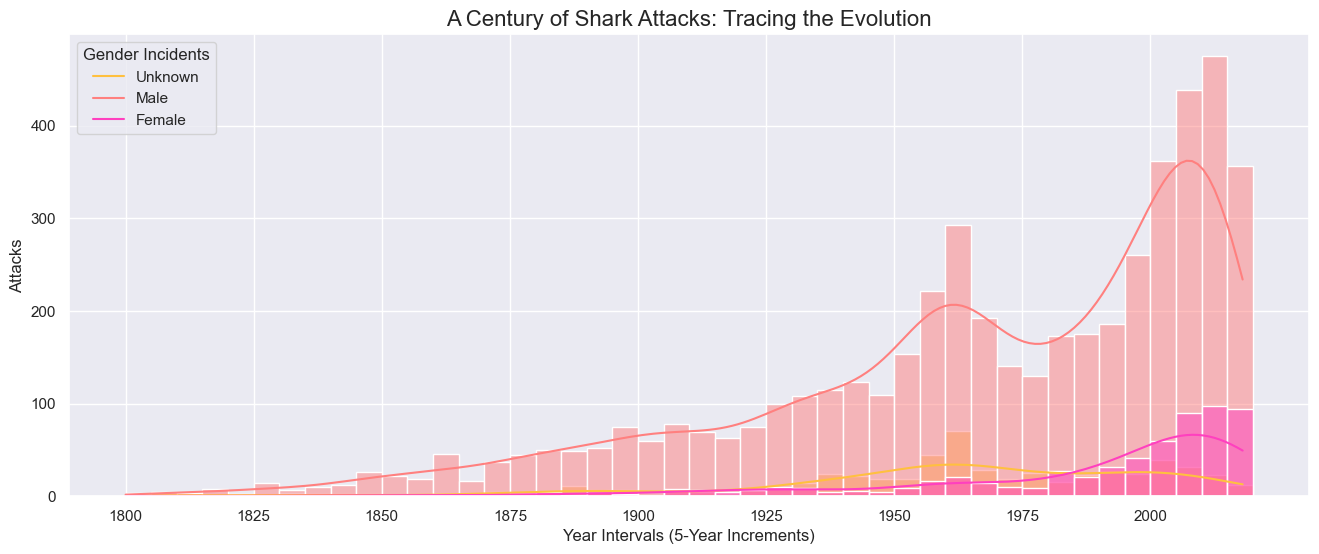

In [5]:
shark_attacks_1 = shark_attacks_1[shark_attacks_1['clean_year'] >= 1800]
bins = range(int(shark_attacks_1['clean_year'].min()), int(shark_attacks_1['clean_year'].max()) + 5, 5)
plot_1 = sns.histplot(data=shark_attacks_1, x='clean_year', bins=bins, kde=True, palette="spring", hue='clean_sex')
plt.title('A Century of Shark Attacks: Tracing the Evolution', fontsize=16)
plt.xlabel('Year Intervals (5-Year Increments)')
plt.ylabel('Attacks')
plt.legend(labels=["Unknown", "Male", "Female"], title="Gender Incidents")
plt.xticks(range(shark_attacks_1['clean_year'].min(), shark_attacks_1['clean_year'].max() + 1, 25))
plot_1.figure.savefig(f'../images/trace_evolution.png', bbox_inches='tight')
plt.show()

The kde=True compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

    Shark Attack Activities: What Stands Out as the Most Common?, Which Gender Dominates the Scene?

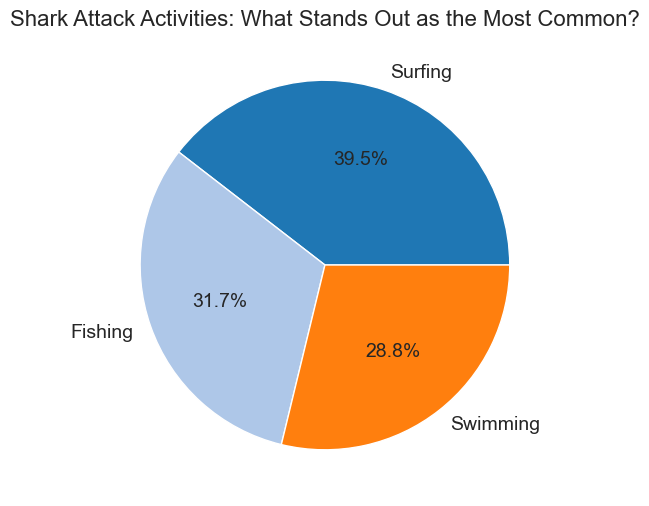

In [12]:
shark_attacks_2 = shark_attacks[shark_attacks['clean_activity'] != 'Unknown']
activities = set(shark_attacks_2['clean_activity'])
mean = len(shark_attacks_2) / len(activities)
activities_ = shark_attacks_2['clean_activity'].value_counts()
activities_to_keep = activities_[activities_ >= mean].index
# Filtrar el DataFrame original para mantener solo las actividades en activities_to_keep
shark_attacks_filtered = shark_attacks_2[shark_attacks_2['clean_activity'].isin(activities_to_keep)]
shark_attacks_filtered_count = shark_attacks_filtered['clean_activity'].value_counts()
shark_attacks_filtered_count.plot.pie(autopct="%.1f%%", colors=sns.color_palette('tab20'), textprops={'fontsize':14})

plt.title('Shark Attack Activities: What Stands Out as the Most Common?', fontsize=16)
plt.ylabel('')
plt.savefig(f'../images/most_common_activity.png', bbox_inches='tight')
plt.show()



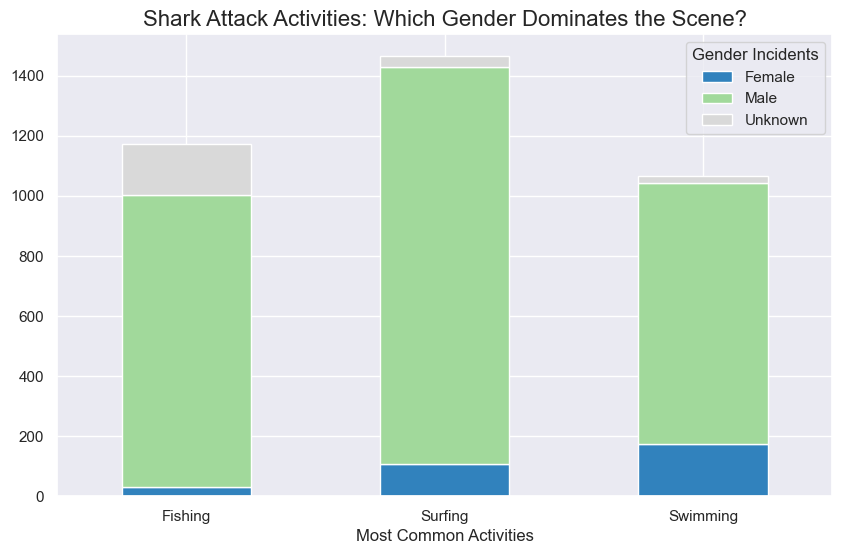

In [34]:
sns.set(rc={"figure.figsize": (10, 6)})
grouped = shark_attacks_filtered.groupby(['clean_activity', 'clean_sex']).size().unstack()
grouped.plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Shark Attack Activities: Which Gender Dominates the Scene?', fontsize=16)
plt.xlabel('Most Common Activities')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend(labels=["Female", "Male", "Unknown"], title="Gender Incidents")
plt.show()

    Shark Attack Patterns: The Age Connection (Young Minds at Play)

C:\Users\noemi\AppData\Local\Temp\ipykernel_31884\880602447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks_3['clean_age'] = shark_attacks_3['clean_age'].astype(int)


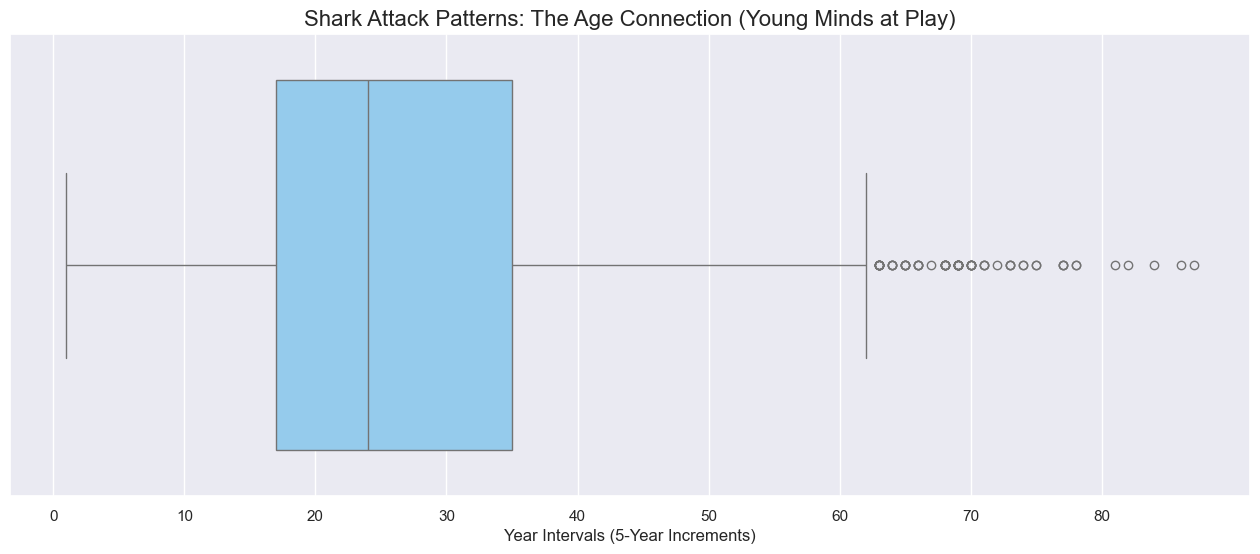

In [26]:
sns.set(rc={"figure.figsize": (16, 6)})
shark_attacks_3 = shark_attacks[(shark_attacks['clean_age'] != '< 1') & (shark_attacks['clean_age'] != 'Unknown')]
shark_attacks_3['clean_age'] = shark_attacks_3['clean_age'].astype(int)
shark_attacks_3 = shark_attacks_3.sort_values(by='clean_age')
plot_3 = sns.boxplot(data=shark_attacks_3, x='clean_age', color="lightskyblue")
plt.title('Shark Attack Patterns: The Age Connection (Young Minds at Play)', fontsize=16)
plt.xlabel('Year Intervals (5-Year Increments)')
plt.xticks(range(0, shark_attacks_3['clean_age'].max() + 1, 10))
plot_3.figure.savefig(f'../images/age_attack_patterns.png', bbox_inches='tight')
plt.show()


    Exploring Shark Activity: A 24-Hour Perspective

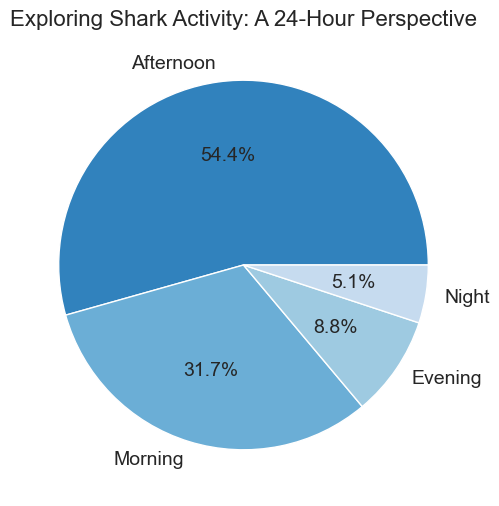

In [8]:
shark_attacks_4 = shark_attacks[shark_attacks['clean_time'] != 'Unknown']
shark_activity = shark_attacks_4['clean_time'].value_counts()
shark_activity.plot.pie(autopct="%.1f%%", colors=sns.color_palette('tab20c'), textprops={'fontsize':14})
plt.title('Exploring Shark Activity: A 24-Hour Perspective', fontsize=16)
plt.ylabel('')
plt.savefig(f'../images/shark_activity.png', bbox_inches='tight')
plt.show()

    Diving into Data: Men's Role in Shark Attacks

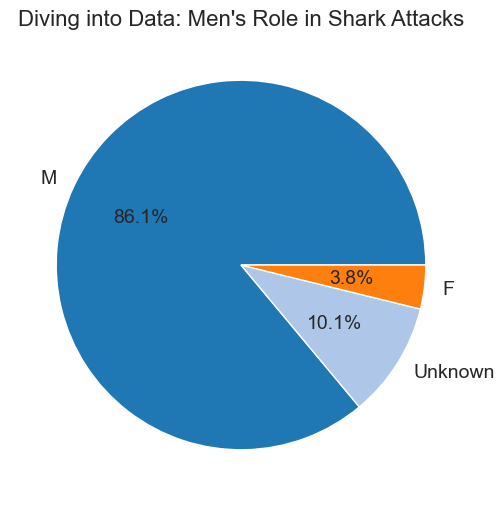

In [35]:
shark_attacks_5 = shark_attacks[shark_attacks['type'] == 'Provoked']
men_behavior = shark_attacks_5['clean_sex'].value_counts()
# men_behavior.plot.pie(autopct="%.1f%%", colors=['cornflowerblue', 'orange', 'plum'], textprops={'fontsize':14})
men_behavior.plot.pie(autopct="%.1f%%", colors=sns.color_palette('tab20'), textprops={'fontsize':14})

plt.title("Diving into Data: Men's Role in Shark Attacks", fontsize=16)
plt.ylabel('')
plt.savefig(f'../images/men_behavior.png', bbox_inches='tight')
plt.show()
